
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---

# Datos y Modelos


In [3]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [4]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [5]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# Estadística descriptiva

Hemos estado organizando y visualizando los datos de distintas maneras, pero ¿qué intuiciones podemos obtener?

Las visualizaciones como histogramas o gráficos de conteo muestran la cantidad de veces que se observa cada valor en un conjunto de realizaciones de una variable aleatoria. Esto se denomina análisis de frecuencia, y es parte de la **estadística descriptiva**.

El uso de visualizaciones nos limita a estimaciones, pero los datos crudos son demasiado como para intepretarlos en conjunto. Para eso, la estadística descriptiva provee también medidas de tendencia central y de dispersión, que resumen en un valor numérico propiedades de las realizaciones de la variable.

Retomemos el problema original con la v.a. `salary_monthly_NETO`, ¿qué información brindan las siguientes métricas y cómo usarlas?


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [6]:
salary_col='salary_monthly_BRUTO'

In [7]:
df[salary_col].describe().apply(lambda s: '{0:.2f}'.format(s))

count       6095.00
mean      124058.55
std       122912.35
min            1.00
25%        61595.00
50%        96000.00
75%       145000.00
max      2180000.00
Name: salary_monthly_BRUTO, dtype: object

In [8]:
pd.options.display.float_format = '${:.2f}'.format # formatea la salida del describe
df.describe()

,profile_age,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,salary_on_call_duty_charge,salary_monthly_BRUTO,salary_monthly_NETO,salary_satisfaction,salary_comparison_last_semester,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,company_recommended,company_diversity_policies
count,$6095.00,$6095.00,$6095.00,$6095.00,$6095.00,$6095.00,$6095.00,$5883.00,$6095.00,$6095.00,$6095.00,$6095.00,$6095.00,$6095.00
mean,$41.18,$8.93,$3.31,$2.89,$2.21,$664.04,$124058.55,$94907.95,$2.62,$2.36,$10.44,$2.79,$7.34,$7.62
std,$665.72,$7.16,$4.37,$3.42,$32.98,$10540.52,$122912.35,$96862.26,$0.86,$0.95,$12.86,$2.84,$2.02,$2.32
min,$18.00,$0.00,$0.00,$0.00,$0.00,$0.00,$1.00,$1.00,$1.00,$1.00,$0.00,$0.00,$1.00,$1.00
25%,$27.00,$3.00,$0.00,$1.00,$0.00,$0.00,$61595.00,$51480.00,$2.00,$2.00,$0.00,$0.00,$6.00,$6.00
50%,$31.00,$7.00,$2.00,$2.00,$0.00,$0.00,$96000.00,$78000.00,$3.00,$2.00,$7.00,$2.00,$8.00,$8.00
75%,$37.00,$13.00,$4.00,$4.00,$0.00,$0.00,$145000.00,$106000.00,$3.00,$3.00,$18.00,$6.00,$9.00,$10.00
max,$52000.00,$115.00,$43.00,$34.00,$2500.00,$650000.00,$2180000.00,$2080000.00,$4.00,$4.00,$100.00,$8.00,$10.00,$10.00


## Medidas de tendencia central

Cuando se quiere obtener un valor representativo de todas las realizaciones de una v.a., o su centro, se utiliza una *medida de tendencia central*.

Repasando, dada una característica de interés (modelada por X v.a.) y un conjunto de observaciones $x = \{ x_1, x_2 ... \}$ donde $x_i = X(\omega_i)$ para algún $\omega_i \in \Omega$, y $N = |x|$:

* La **media muestral** (aritmética) o promedio se calcula como:

$$ \bar{x} = \frac{1}{N} \sum_i^N x_i $$

* La **mediana** se calcula:
  1. Ordenar las realizaciones tal que $x_j \leq x_{j+1}$ 
  2. Si la cantidad de datos $N$ es impar, la mediana es el valor central: $median = x_{\lfloor N / 2 \rfloor +1}$
  3. Si la cantidad de datos $N$ es par, la mediana es e promedio de los dos valores centrales: $median = \frac{1}{2} (x_{ N / 2 } + x_{ (N / 2) +1})$

* La **moda** son los valores o él valor con mayor frecuencia, es decir, los o él que más se repite.


In [9]:
df[salary_col].mean(), df[salary_col].median()

(124058.54962132902, 96000.0)

**¿Por qué las dos medidas son tan distintas?**

* La media se puede interpretar como el *centro de masa* del histograma. Es decir, si el histograma fuera una figura de madera, el punto de equilibrio donde podemos apoyarlo y no se cae es la media.
* La media es muy sensible a valores extremos. 
* La mediana es más robusta a valores extremos.
* Si la distribución de los datos es simétrica, las medidas coinciden. (Luego, si no coinciden es porque la distribución no es simétrica)

**¿Se cumple para estos datos?**

*Lo siguiente que hace es armar un ciclo donde va limitando por valor maximo, osea va truncando los valores mayores a un maximo que va disminuyendo en el ciclo*

In [10]:
max_salaries = [df[salary_col].max(), 10**6, 500000, 400000, 300000, 200000]
central_tendency = [
    (max_salary, df[df[salary_col] < max_salary][salary_col].mean(),
     df[df[salary_col] < max_salary][salary_col].median())
    for max_salary in max_salaries
]
central_tendency

[(2180000.0, 123721.17819855602, 96000.0),
 (1000000, 120723.13043954605, 96000.0),
 (500000, 112145.56938829432, 95000.0),
 (400000, 107991.96966661021, 94000.0),
 (300000, 102223.41686622657, 92000.0),
 (200000, 91461.11102857142, 88000.0)]

Se pueden graficar estos números para lograr una mejor intuición de la magnitud de las diferencias. Además, al mostrar una visualización se pueden incluir más puntos.

Para poder crear gráficos de seaborn con distintos grupos de datos, muchas veces es necesario cambiar el formato del dataframe de wide a long. Ver [este link](https://anvil.works/blog/tidy-data) para más información.

In [11]:
central_tendency_max = [
    (max_salary, df[df[salary_col] < max_salary][salary_col].mean(),
     df[df[salary_col] < max_salary][salary_col].median())
    for max_salary in range(50000, int(df[salary_col].max()), 10**4)
]
central_tendency_max_df = pd.DataFrame(central_tendency_max,
                                   columns=['max_salary', 'mean', 'median'])\
  .melt(id_vars='max_salary', var_name='metric')

central_tendency_max_df[:3]

,max_salary,metric,value
0,50000,mean,$30339.53
1,60000,mean,$37032.45
2,70000,mean,$44179.53


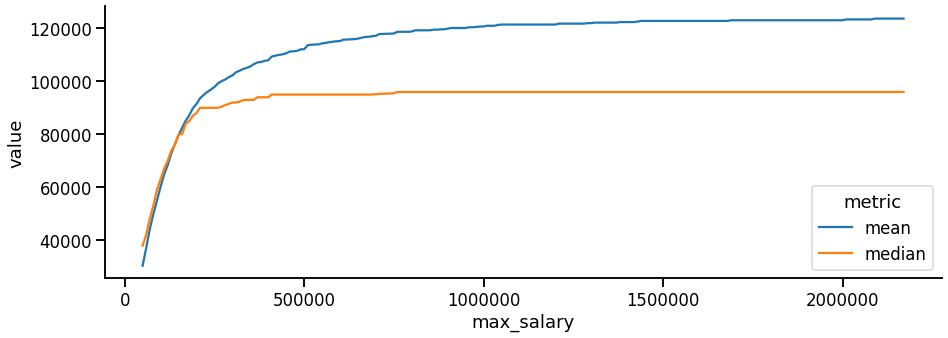

In [12]:
# ¡Podemos ver estos datos visualmente! valga la redundancia!!
fig = plt.figure(figsize=(15, 5))
seaborn.lineplot(data=central_tendency_max_df, x='max_salary', y='value', hue='metric')
plt.ticklabel_format(style='plain', axis='x')
seaborn.despine()

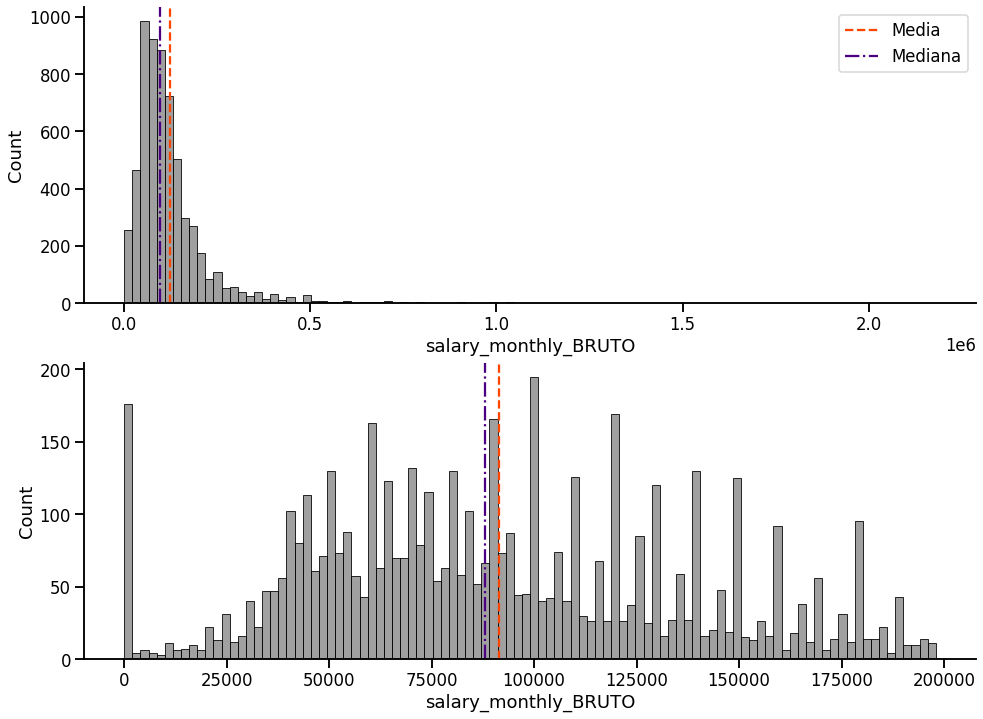

In [13]:
## La diferencia no siempre se aprecia en los gráficos
fig, axes = plt.subplots(nrows=2, figsize=(16, 12))
seaborn.histplot(df[salary_col], bins=100, ax=axes[0], color='gray')
axes[0].axvline(df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana')

filtered_df = df[df[salary_col] < 200000]
seaborn.histplot(filtered_df[salary_col], bins=100, ax=axes[1], color='gray')
axes[1].axvline(filtered_df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(filtered_df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana')

axes[0].legend()
seaborn.despine()

¿Qué decir de la moda? Sólo que el resultado de la función no es un valor, sino una series de valores, aunque la serie tenga un único elemento.

In [14]:
df.profile_gender.mode()

0    Hombre
dtype: object

## Medidas de dispersión

Las medidas de dispersión vistas en el teórico son la desviación estándar, la varianza, y el coeficiente de variación. También permiten representar con un número alguna propiedad de los datos.

Por ejemplo, comparemos el salario neto con el salario bruto. A priori, **¿deberíamos ver alguna diferencia?**

In [15]:
df[['salary_monthly_NETO', 'salary_monthly_BRUTO']].describe().round()

,salary_monthly_NETO,salary_monthly_BRUTO
count,$5883.00,$6095.00
mean,$94908.00,$124059.00
std,$96862.00,$122912.00
min,$1.00,$1.00
25%,$51480.00,$61595.00
50%,$78000.00,$96000.00
75%,$106000.00,$145000.00
max,$2080000.00,$2180000.00


Claramente, ambas distribuciones están centradas en valores distintos, pero ¿podemos decir algo sobre su dispersión?

Cuando se comparan dos características diferentes (que pueden tener magnitudes diferentes) puede no ser conveniente comparar directamente los valores de las desviaciones estándar, sino que podemos usar el coeficiente de variación (desviación estándar dividida la media).

In [16]:
import scipy

print("Coeficiente de variación salario bruto",
      scipy.stats.variation(df.salary_monthly_BRUTO))
print("Coeficiente de variación salario neto",
      scipy.stats.variation(df.salary_monthly_NETO.dropna()))

Coeficiente de variación salario bruto 0.9906795521353624
Coeficiente de variación salario neto 1.0205048799041485


## Percentiles y gráficos de caja

Los gráficos de caja son otra forma de representar la distribución de las realizaciones de una v.a. numérica, de una forma más condensada que un histograma.

Son muy útiles para comparar muchas distribuciones, pero sólo cuando son muy distintas entre ellas, ya que oscurecen algunas sutilezas. Otros problema de este tipo de gráficos es que *no todo el mundo recuerda cómo leerlos*.

En estadística descriptiva, un gráfico de caja es un método para representar gráficamente grupos de datos numéricos a través de sus cuartiles. Los gráficos de caja también pueden tener líneas que se extienden verticalmente desde las cajas (bigotes) indicando la variabilidad fuera de los cuartiles superior e inferior. Los valores atípicos pueden representarse como puntos individuales.

La definición anterior sugiere que, si hay un valor atípico, se representará como un punto en el diagrama de caja, mientras que el resto de los datos de la muestra se agrupará y se mostrará en forma de cajas. Intentemos verlo nosotros mismos.
<center>
<img src="https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png" height="300" />
</center>

[Boxplot explicado breve](https://med.unne.edu.ar/sitio/multimedia/imagenes/ckfinder/files/files/aps/GR%C3%81FICO%20DE%20CAJA.pdf)

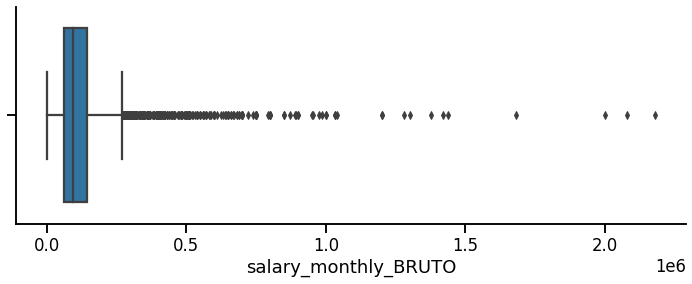

In [17]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df[salary_col])
seaborn.despine()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


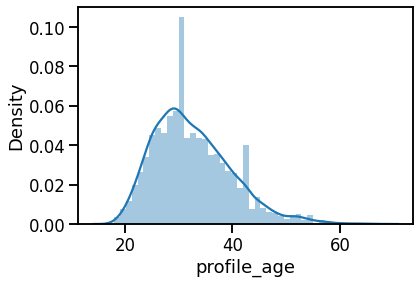

In [18]:
seaborn.distplot(df[df.profile_age < 100].profile_age)

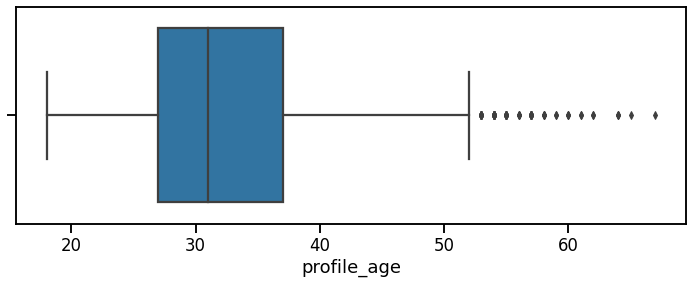

In [19]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df[df.profile_age < 100].profile_age)

Por ejemplo, podemos comparar la distribución de los salarios netos con respecto al nivel de estudios alcanzado.

In [51]:
df[salary_col].max()

2180000.0

In [21]:
df['profile_studies_level'].value_counts().values

array([4133, 1135,  449,  342,   30,    4,    2])

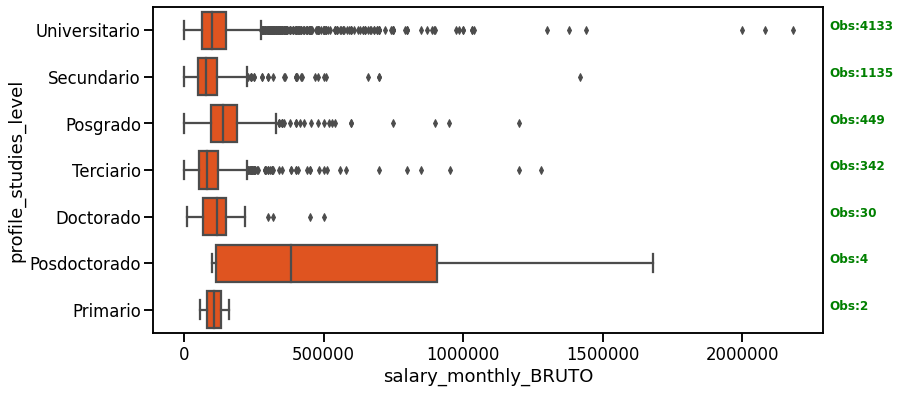

In [65]:
plt.figure(figsize=(12, 6))
ax = seaborn.boxplot(data=df, x=salary_col, y='profile_studies_level',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')
#ax.set_xlim(1,df[salary_col].max()+100000)

# Agrego el númeroo de observaciones a cada boxplot. Pienso que es importante para conocer la relevancia de la distribución.

# Calculate number of obs per group & median to position labels
medians = df.groupby(['profile_studies_level'])['salary_monthly_BRUTO'].median().values
nobs = df['profile_studies_level'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["Obs:" + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_yticklabels()):
  ax.text(df[salary_col].max()+130000, tick, nobs[tick], fontsize=12, weight='semibold', color='green')


**¿Qué puede estar causando una diferencia tan grande en la distribución para las respuestas que dicen Posdoctorado?**

### Boxenplots

Los boxplots tienen una gran desventaja: ocultan mucha información en la distribución de las colas. Por ejemplo, para la categoría Posdoctorado, sabemos que el 25% de los valores de sueldo neto es mayor que los ~650000 pesos. Pero no conocemos cómo se distribuyen. Para conjuntos de datos de gran tamaño, el 25% de los datos contiene mucha información.

Un gráfico más informativo es el **boxenplot**, que visualiza más percentiles. Otra ventaja es la percepción del mismo debido al peso visual de las cajas: los datos en el rango intercuartílico no parecen muuuucho más importantes que los datos en las colas.

Sin embargo, es aún más difícil de leer si buscamos exactitud, ya que los percentiles que definen el límite de cada caja se definen recursivamente y no decrecen linealmente.

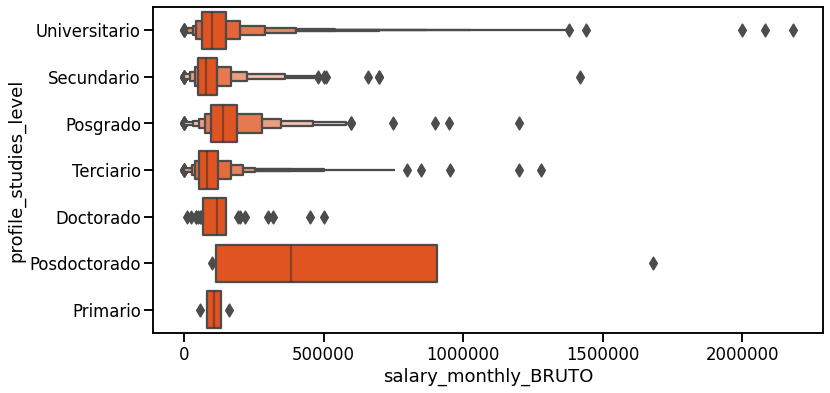

In [ ]:
plt.figure(figsize=(12, 6))
seaborn.boxenplot(data=df, x=salary_col, y='profile_studies_level',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

## Eliminación de valores extremos

### Usando percentiles 

Una forma conservadora de eliminar valores extremos que estén afectando a la media, el rango y las visualizaciones es seleccionar un cierto porcentaje más extremo. Para eso, usamos los percentiles.

Por ejemplo, podemos elegir quedarnos con el 99% de salarios más bajos, eliminando el 1%. Podemos calcular todos los percentiles para decidir cuál sería el más apropiado.

In [ ]:
k = 90
percentile_90 = df[salary_col].quantile(k / 100)
n_below = len(df[df[salary_col] < percentile_90])
n_above = len(df[df[salary_col] > percentile_90])
print('Percentil {} de la columna {}: {}'.format(k, salary_col, percentile_90))
print('% de datos menor que percentil {}: {}'.format(k, n_below / len(df)))
print('% de datos mayor que percentil {}: {}'.format(k, n_above / len(df)))

Percentil 90 de la columna salary_monthly_BRUTO: 220000.0
% de datos menor que percentil 90: 0.8997538966365873
% de datos mayor que percentil 90: 0.09581624282198524


In [ ]:
df[salary_col].quantile([.95, .98, .99, .995, .998])

0.950     307150.0
0.980     480000.0
0.990     630600.0
0.995     796240.0
0.998    1032671.0
Name: salary_monthly_BRUTO, dtype: float64

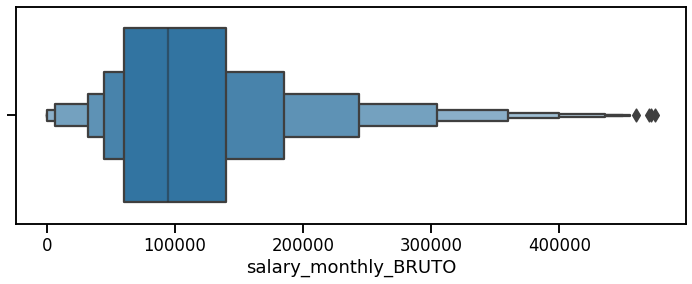

In [ ]:
plt.figure(figsize=(12, 4))
max_limit = df[salary_col].quantile(.98)
seaborn.boxenplot(x=df[df[salary_col] < max_limit][salary_col])

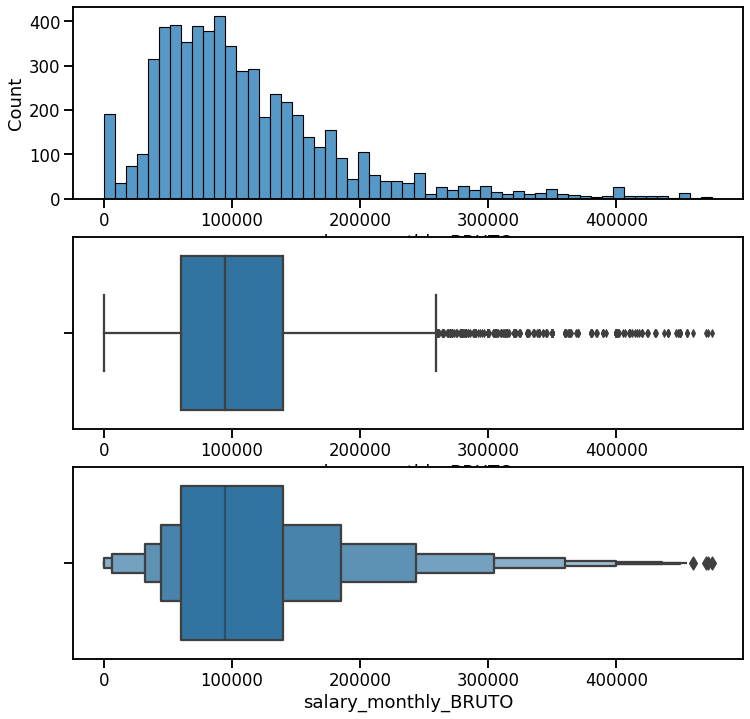

In [ ]:
fig, axes = plt.subplots(figsize=(12, 12), nrows=3)
max_limit = df[salary_col].quantile(.98)
data = df[df[salary_col] < max_limit][salary_col]
seaborn.histplot(x=data, ax=axes[0])
seaborn.boxplot(x=data, ax=axes[1])
seaborn.boxenplot(x=data, ax=axes[2])

### Rango itercuartílico

In [ ]:
def clean_outliers_q3(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (interesting_col <= (2.5 * interesting_col.quantile(.75)))
    return dataset[mask_outlier]

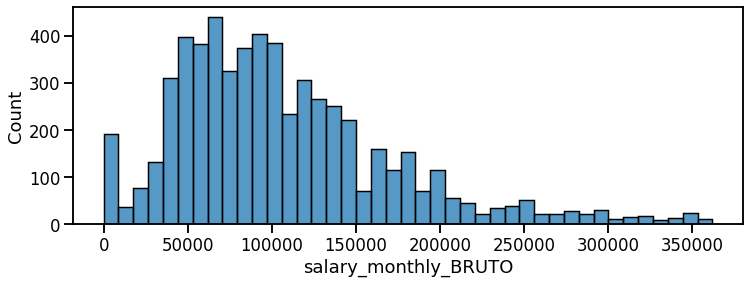

In [ ]:
fig = plt.figure(figsize=(12, 4))
data = clean_outliers_q3(df, salary_col)[salary_col]
seaborn.histplot(x=data)

In [ ]:
def clean_outliers_sd(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (
        numpy.abs(interesting_col - interesting_col.mean()) <=
        (2.5 * interesting_col.std()))
    return dataset[mask_outlier]

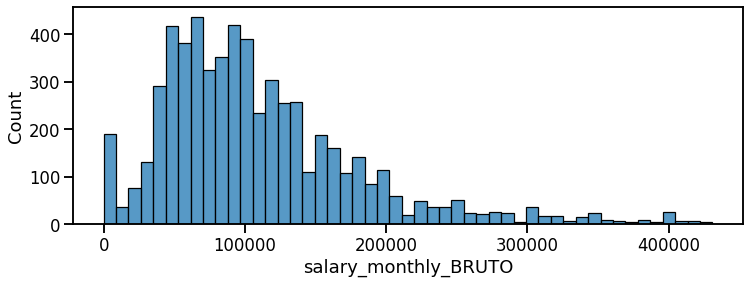

In [ ]:
fig = plt.figure(figsize=(12, 4))
data = clean_outliers_sd(df, salary_col)[salary_col]
seaborn.histplot(x=data)

### ¡Mirando los datos!

¿Quiénes son los que cobran tanto?

In [ ]:
df[df[salary_col] > df[salary_col].quantile(0.98)]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
261,Hombre,37,Argentina,Ciudad Autónoma de Buenos Aires,21.0,10.0,10.0,17,Universitario,Incompleto,NaN,NaN,No,Sí,Sí,VP / C-Level,"Docker, Firebase, Google Cloud Platform/App En...","Bash/Shell, Go, HTML, Javascript, Perl, PHP, P...","jQuery, Rails, React.js","Google Cloud Storage, MariaDB, MySQL, Percona ...",Ninguna,"Vi, Vim",GNU/Linux,Android,No,0.0,Porcentaje de mi sueldo,Full-Time,800000.0,500000.0,NaN,4,4,3+ sueldos,Mix de las anteriores,Uno,20.0,4,Jamás,Heterosexual,NaN,NaN,5001-10000,Producto basado en Software,9,9,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
318,Hombre,40,Argentina,Santa Fe,4.0,0.0,0.0,0,Posdoctorado,Completado,Licenciatura en Ciencias dela Computación,UNR - Universidad Nacional de Rosario,No,Sí,Sí,Developer,Linux,C++,Ninguno,Ninguna,google test,Vim,GNU/Linux,Android,No,0.0,Neto,Remoto (empresa de otro país),650000.0,422500.0,Mi sueldo está dolarizado,3,4,No,No recibo bono,No,0.0,0,Jamás,¿Qué les importa?,NaN,NaN,1001-2000,Servicios / Consultoría de Software / Digital,8,10,"Capacitaciones y/o cursos, Horarios flexibles,...",NaN
437,Hombre,36,Argentina,Ciudad Autónoma de Buenos Aires,17.0,4.0,4.0,15,Universitario,Incompleto,Ingeniería en Informática,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular",No,No,Manager / Director,Ninguna,Java,Ninguno,PostgreSQL,Ninguna,IntelliJ,macOS,iOS,"Sí, pasiva",0.0,Porcentaje de mi sueldo,Full-Time,540000.0,380000.0,NaN,3,2,Un sueldo,Performance de la compañía,No,0.0,0,En un trabajo anterior,¿Qué les importa?,NaN,No,1001-2000,Producto basado en Software,7,10,"Clases de gimnasia online, Comidas pagas / sub...",NaN
453,Hombre,34,Argentina,GBA,14.0,4.0,2.0,0,Universitario,Completado,Ingeniería en Informática,UM - Universidad de Morón,"Sí, de forma particular",No,No,SysAdmin / DevOps / SRE,"Amazon Web Services, Docker, Kubernetes, Linux...","Bash/Shell, Terraform",Terrafor,"Amazon DynamoDB, Amazon RDS/Aurora, ElasticSea...",Ninguna,"IntelliJ, Vim",macOS,iOS,No,0.0,Bruto,Remoto (empresa de otro país),800000.0,NaN,NaN,4,4,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Oveja,NaN,No,11-50,Servicios / Consultoría de Software / Digital,10,8,Vacaciones flexibles (adicionales a las reglam...,Airbnb
467,Hombre,26,Argentina,Córdoba,6.5,1.5,1.5,0,Universitario,Completado,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Developer,"Amazon Web Services, Docker, Linux","Go, Python, Ruby","Flask, Rails","Amazon DynamoDB, Amazon RDS/Aurora, ElasticSea...",RSpec,"IntelliJ, Visual Studio Code",macOS,iOS,No,0.0,Porcentaje de mi sueldo,Remoto (empresa de otro país),515000.0,NaN,NaN,4,4,No,No recibo bono,No,0.0,0,Jamás,Heterosexual,NaN,No,201-500,Producto basado en Software,10,10,"Horarios flexibles, Vacaciones flexibles (adic...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

Volvemos a las filminas

Datos vs Modelo

QQplot